# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

df = pd.read_csv('data/human_body_temperature.csv')

In [21]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# Q 1
* Is the distribution of body temperatures normal?

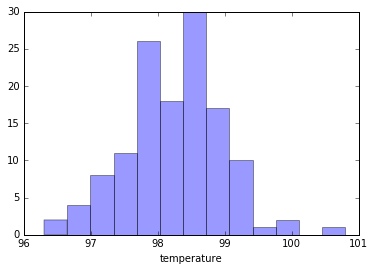

In [45]:
%matplotlib inline
ax = sns.distplot(df.temperature,kde=False)

/Applications/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


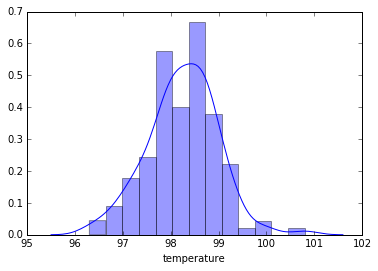

In [46]:
%matplotlib inline
ax = sns.distplot(df.temperature)

In [44]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

# We can conclude that the body temperature is normal distributed based on the p value (0.25) of normal test 

# Q 2
* Is the sample size large? Are the observations independent?

Sample Size calculation is based on the following formula 

n = N*X / (X + N – 1),
where,
N = population size 
p = sample proportion 
Z = zscore for confidence interval 
X = Z^2 * p*(1-p) / Err^2,

In [55]:
# dict of confidence interval to z-score mapping 
ci_to_z = { 80: 1.28,85:1.44,90:1.65,95:1.96,99:2.58}
def GetSampleSize(psize, ci=95 , e=0.05,p=0.5):
    zs = ci_to_z[ci]    # convert confidence interval to z-score
    X = ((zs**2) * (p * (1-p)) / e** 2)
    samp_size = psize * X  / (1 + psize + X)
    return int(samp_size)

In [63]:
print("Sample Size for 1M population size with 95% Condifence Interval , 5% Error Margin = " + str(GetSampleSize(1000000))) 
print("Sample Size for 1M population size with 90% Condifence Interval , 10% Error Margin = " + str(GetSampleSize(1000000,ci=90,e=0.1))) 


Sample Size for 1M population size with 95% Condifence Interval , 5% Error Margin = 384
Sample Size for 1M population size with 90% Condifence Interval , 10% Error Margin = 68


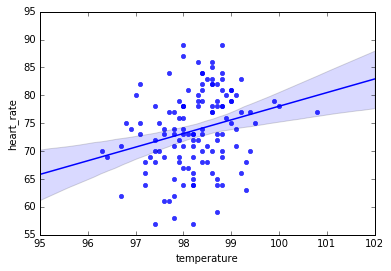

In [33]:

sns.regplot(df['temperature'], df['heart_rate'])

## The above computation specifies the optimal sample population size for various confidence intervals. However given that the sample is normally distributed , independent and sample size (130) is > 30 , the sample set is sufficient 

# Q3 & Q4
* Is the true population mean really 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  t or  z statistic?
* Draw a small sample of size 10 from the data and repeat both tests.
* Which one is the correct one to use?


Ho - Null Hypothesis: The population mean is 98.6F
Ha - Alternative Hypothesis: The population mean is NOT equal 98.6F

As we are assuming the population mean = 98.6F , we can use a one sample t-test to compute the z/t-statistics/probably value 

In [86]:
[tstat,pval] = stats.ttest_1samp(df['temperature'], popmean=98.6)
print("P Value is {0:.3f}".format(pval))
if (pval < 0.05) :
    print("We reject the Null Hypothesis.True Population Mean is NOT 98.6 F")
else:
    print("We accept the Null Hypothesis.True Population Mean is 98.6 F")

P Value is 0.000
We reject the Null Hypothesis.True Population Mean is NOT 98.6 F


## Based on 1 sample test  and p-values we conclude  that the  true mean of the human body temperature is NOT 98.6 

Now lets test the one sample t-test with sample size of 10 

In [89]:
rdm = np.random.choice(len(df),replace=False,size=10)
subset= df.iloc[rdm]
print("P Value is {0:.3f}".format(pval))
[tstat,pval] = stats.ttest_1samp(subset.temperature, popmean=98.6)
if (pval < 0.05) :
    print("We reject the Null Hypothesis.True Population Mean is NOT 98.6 F")
else:
    print("We accept the Null Hypothesis.True Population Mean is 98.6 F")

P Value is 0.024
We accept the Null Hypothesis.True Population Mean is 98.6 F


f_t = df.temperature[df.gender == "F"]
m_t = df.temperature[df.gender == "M"]
df.gender.value_counts()

print("Female:")
print("  Mean        ", f_t.mean())
print("  Variance    ",f_t.var())
print("  Sample size ",len(f_t))


print("Male:")
print("  Mean        ", m_t.mean())
print("  Variance    ",m_t.var())
print("  Sample size ",len(m_t))

# Q 5 
* At what temperature should we consider someone's temperature to be "abnormal"?
* Start by computing the margin of error and confidence interval.


In [76]:
x = df.temperature
a,b = stats.t.interval(0.95,len(x)-1,loc=np.mean(x),scale=stats.sem(x))
print(a,b)

98.1220029056 98.3764586329


## Using the confidence interval from the Z test we can conclude  temperature values less than 98.122 or greater than  98.376 to be abnormal

# Q 6

Is there a significant difference between males and females in normal temperature?
What test did you use and why?


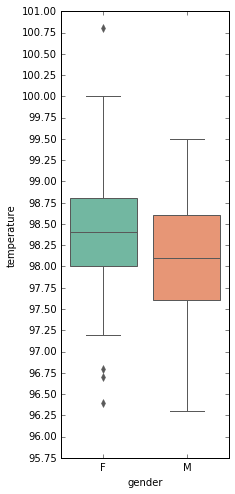

In [54]:
plt.figure(figsize=(3,8))
ax = sns.boxplot(x="gender", y="temperature", data=df,palette="Set2", dodge=True)
ax.set_yticks(np.arange(95.75,101.25,0.25))


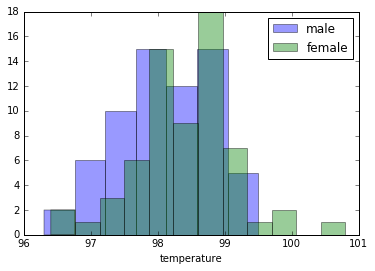

In [24]:
sns.distplot(m_t,kde=False, label='male')
sns.distplot(f_t, label='female',kde=False)
plt.legend()

Ho - Null Hypothesis: The population mean of Males is EQUAL to that of Femels
Ha - Alternative Hypothesis: The population means of Males & Females are NOT  equal

We use a two sample t-test to see if body temperatures are significantly different between males/females] 

In [88]:
[tval,pval] = stats.ttest_ind(m_t,f_t)
if (pval < 0.05) :
    print("We reject the Null Hypothesis.Mean of Males is NOT EQUAL to Mean of Females")
else:
    print("We accept the Null Hypothesis.Mean of Males is  EQUAL to Mean of Females")

We reject the Null Hypothesis.Mean of Males is NOT EQUAL to Mean of Females


Since our p-value is less than 0.05, we can reject our null hypothesis with 95% confidence.

## Based on two sample test  and p-values we conclude  that the  true mean of the males and females are NOT the same 